In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse

In [41]:
# define the instruments to download

companies_dict={
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Nortcorp Grueman':'NOC',
    'BOEING': 'BA',
    'LOCKHEED MARTIN':'LMT',
    'McDONADS':'MCD',
    'INTEL':'INTC',
    'NAVISTAR':'NAV',
    'IBM':'IBM',
    'TEXAS INSTRUMENT':'TXN',
    'MASTERCARD':'MA',
    'MICROSFT':'MSFT',
    'GENERAL ELECTRICS':'GE',
    'SYMANTIC':'SYNC',
    'AMERICAN EXPRESS':'AXP',
    'PEPSI':'PEP',
    'COCA COLA': 'KO',
    'JOHNSON&J':'JNJ',
    'TOYOTA':'TM',
    'HONDA':'HMC',
    'MISTBUSCHI':'MSBHY',
    'SONY':'SNE',
    'EXXON':'XON',
    'CHEVRON':'CVX',
    'VALERO ENERGY': 'VLO',
    'FORD':'F',
    'BANK OF AMERICA':'BAC',
}
companies=sorted(companies_dict.items(),key=lambda x:x[1])

In [42]:
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('AMERICAN EXPRESS', 'AXP'), ('BOEING', 'BA'), ('BANK OF AMERICA', 'BAC'), ('CHEVRON', 'CVX'), ('FORD', 'F'), ('GENERAL ELECTRICS', 'GE'), ('HONDA', 'HMC'), ('IBM', 'IBM'), ('INTEL', 'INTC'), ('JOHNSON&J', 'JNJ'), ('COCA COLA', 'KO'), ('LOCKHEED MARTIN', 'LMT'), ('MASTERCARD', 'MA'), ('McDONADS', 'MCD'), ('MISTBUSCHI', 'MSBHY'), ('MICROSFT', 'MSFT'), ('NAVISTAR', 'NAV'), ('Nortcorp Grueman', 'NOC'), ('PEPSI', 'PEP'), ('SONY', 'SNE'), ('SYMANTIC', 'SYNC'), ('TOYOTA', 'TM'), ('TEXAS INSTRUMENT', 'TXN'), ('VALERO ENERGY', 'VLO'), ('Walgreen', 'WBA'), ('EXXON', 'XON')]


In [43]:
#using yahoo to extract the data
from pandas_datareader import data

In [44]:
data_source='yahoo'

In [52]:
start_date='2015-01-01'
end_date='2018-12-31'
#loading the desired stock data
panel_data=data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)

print(panel_data.axes)

[DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None), MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NOC', 'PEP', 'SNE', 'SYNC', 'TM', 'TXN', 'VLO', 'WBA', 'XON']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [150]:
panel_data.head()

Attributes        High                                                \
Symbols           AAPL        AMZN        AXP          BA        BAC   
Date                                                                   
2014-12-31  113.129997  312.980011  94.750000  132.300003  18.209999   
2015-01-02  111.440002  314.750000  93.940002  131.839996  18.030001   
2015-01-05  108.650002  308.380005  92.779999  129.919998  17.809999   
2015-01-06  107.430000  303.000000  90.900002  129.619995  17.440001   
2015-01-07  108.199997  301.279999  91.010002  129.970001  17.180000   

Attributes                                                         ...      \
Symbols            CVX      F         GE        HMC         IBM    ...       
Date                                                               ...       
2014-12-31  113.309998  15.64  24.538462  29.799999  161.500000    ...       
2015-01-02  113.000000  15.65  24.480770  29.780001  163.309998    ...       
2015-01-05  111.199997  15.13  24.048077  29.400000  161.270004    ...       
2015-01-06  109.019997  14.90  23.625000  29.139999  159.960007    ...       
2015-01-07  109.730003  15.09  23.451923  29.230000  157.199997    ...       

Attributes  Adj Close                                                      \
Symbols           NAV         NOC        PEP        SNE  SYNC          TM   
Date                                                                        
2014-12-31  33.480000  136.999435  82.754585  19.971592  2.00  108.556282   
2015-01-02  34.160000  136.134979  82.649574  20.059402  2.05  108.720650   
2015-01-05  33.099998  133.262863  82.028191  19.766705  2.07  106.730850   
2015-01-06  32.299999  133.997177  81.406845  19.756950  1.99  105.632149   
2015-01-07  32.919998  138.235733  83.787254  21.005785  2.02  108.288078   

Attributes                                              
Symbols           TXN        VLO        WBA        XON  
Date                                                    
2014-12-31  47.283752  41.604591  69.451050  27.530001  
2015-01-02  47.292595  42.310612  69.268761  26.110001  
2015-01-05  46.558628  40.570782  67.901611  26.080000  
2015-01-06  45.789280  40.074894  68.074776  26.350000  
2015-01-07  46.611687  39.763908  69.815613  27.360001  

[5 rows x 168 columns]

In [61]:
panel_data.columns

MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NOC', 'PEP', 'SNE', 'SYNC', 'TM', 'TXN', 'VLO', 'WBA', 'XON']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,

In [63]:
stock_close=panel_data['Close']
stock_open=panel_data['Open']

print(stock_close.iloc[1])

Symbols
AAPL     109.330002
AMZN     308.519989
AXP       93.019997
BA       129.949997
BAC       17.900000
CVX      112.580002
F         15.360000
GE        24.096153
HMC       29.590000
IBM      162.059998
INTC      36.360001
JNJ      104.519997
KO        42.139999
LMT      193.309998
MA        85.680000
MCD       93.260002
MSBHY     36.720001
MSFT      46.759998
NAV       34.160000
NOC      146.460007
PEP       94.440002
SNE       20.559999
SYNC       2.050000
TM       125.669998
TXN       53.480000
VLO       50.340000
WBA       76.000000
XON       26.110001
Name: 2015-01-02 00:00:00, dtype: float64


In [64]:
# calculate daily stock movements, here changing the shape of the array
stock_close=np.array(stock_close).T
stock_open=np.array(stock_open).T

In [65]:
row,col=stock_close.shape

In [66]:
row,col

(28, 1007)

In [68]:
stock_close[1,:]

array([ 310.3500061 ,  308.51998901,  302.19000244, ..., 1461.64001465,
       1478.02001953, 1501.9699707 ])

In [72]:
movements=np.zeros([row, col])
for i in range(0,row):
    movements[i,:]=np.subtract(stock_close[i,:],stock_open[i,:])

In [75]:
for i in range(0,len(companies)):
    print('Company:{},change:{}'.format(companies[i][0],sum(movements[i][:])))

Company:Apple,change:-0.31005859375
Company:Amazon,change:-672.9100646972656
Company:AMERICAN EXPRESS,change:-12.769882202148438
Company:BOEING,change:55.91004943847656
Company:BANK OF AMERICA,change:-11.240015983581543
Company:CHEVRON,change:-6.829917907714844
Company:FORD,change:-12.120005130767822
Company:GENERAL ELECTRICS,change:-6.0864973068237305
Company:HONDA,change:-15.489997863769531
Company:IBM,change:-23.589981079101562
Company:INTEL,change:15.280046463012695
Company:JOHNSON&J,change:21.339866638183594
Company:COCA COLA,change:10.549964904785156
Company:LOCKHEED MARTIN,change:-62.229949951171875
Company:MASTERCARD,change:18.939895629882812
Company:McDONADS,change:37.77991485595703
Company:MISTBUSCHI,change:20.040037155151367
Company:MICROSFT,change:6.299957275390625
Company:NAVISTAR,change:-28.369972705841064
Company:Nortcorp Grueman,change:-14.860000610351562
Company:PEPSI,change:23.98003387451172
Company:SONY,change:-13.920040130615234
Company:SYMANTIC,change:0.46999943256

In [155]:
movements.shape

(28, 1007)

Text(0.5,1,"('Amazon', 'AMZN')")

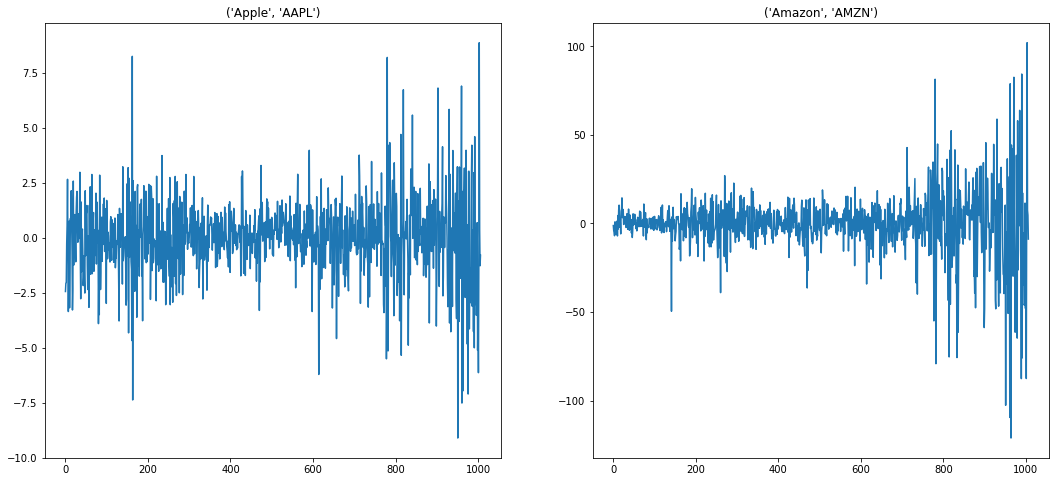

In [82]:
fig=plt.figure(figsize=(18,8))
ax1=plt.subplot(121)
plt.plot(movements[0][:])
plt.title(companies[0])
ax2=plt.subplot(122)
plt.plot(movements[1][:])
plt.title(companies[1])

In [83]:
#We need to normalize the change because the change of 4 for boeing is different from Amazon. So, there is a need for normalization otherwidse the clustering algorithm with cluster based of size of change only.

In [88]:
# Importing the Normalizing
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
nor=normalizer.fit_transform(movements)

print(nor.min(),nor.max())

-0.3329163408562679 0.25391329298388454


Text(0.5,1,"('Amazon', 'AMZN')")

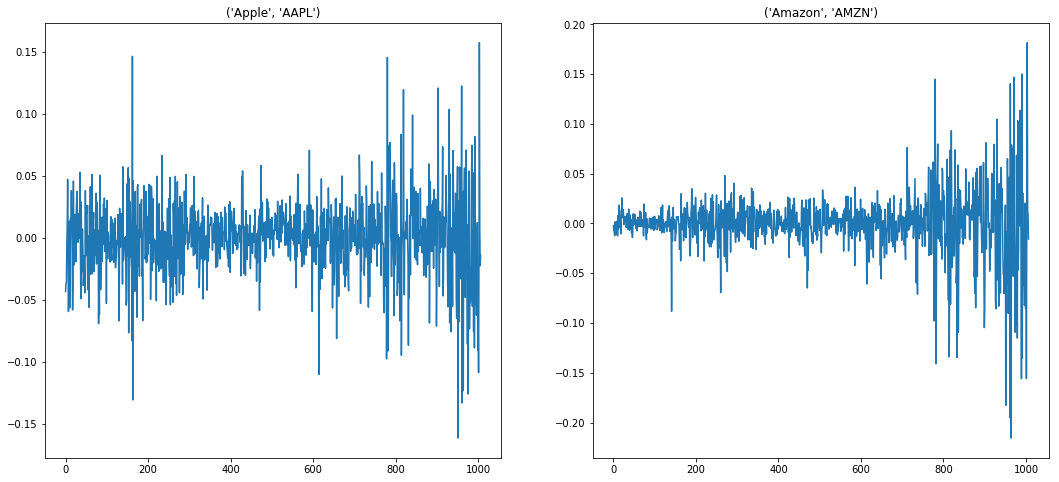

In [89]:
fig=plt.figure(figsize=(18,8))
ax1=plt.subplot(121)
plt.plot(nor[0][:])
plt.title(companies[0])
ax2=plt.subplot(122)
plt.plot(nor[1][:])
plt.title(companies[1])

In [111]:
# Using the K-Means clustering
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer


# deffining normalize
normalizer=Normalizer()

# creating KMeans 
kmeans=KMeans(n_clusters=5,max_iter=1000)

# Make a pipeline chaining normalizer and kmeans
pipeline=make_pipeline(normalizer,kmeans)

In [112]:
pipeline.fit(movements)

print(kmeans.inertia_) # smaller the better

13.098342521551668


In [113]:
# Predict the cluster labels
labels=pipeline.predict(movements)
# create a Dataframe aligning labels and companies
df=pd.DataFrame({'labels':labels,'companies':companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                companies
22       0         (SYMANTIC, SYNC)
27       1             (EXXON, XON)
24       1  (TEXAS INSTRUMENT, TXN)
10       1            (INTEL, INTC)
23       2             (TOYOTA, TM)
9        2               (IBM, IBM)
18       2          (NAVISTAR, NAV)
8        2             (HONDA, HMC)
6        2                (FORD, F)
5        2           (CHEVRON, CVX)
4        2   (BANK OF AMERICA, BAC)
2        2  (AMERICAN EXPRESS, AXP)
7        2  (GENERAL ELECTRICS, GE)
16       2      (MISTBUSCHI, MSBHY)
25       3     (VALERO ENERGY, VLO)
21       3              (SONY, SNE)
19       3  (Nortcorp Grueman, NOC)
0        3            (Apple, AAPL)
14       3         (MASTERCARD, MA)
3        3             (BOEING, BA)
1        3           (Amazon, AMZN)
17       3         (MICROSFT, MSFT)
13       3   (LOCKHEED MARTIN, LMT)
15       4          (McDONADS, MCD)
20       4             (PEPSI, PEP)
26       4          (Walgreen, WBA)
12       4          (COCA CO

In [114]:
from sklearn.decomposition import PCA

In [116]:

# visualize the results on PCA-reduced data
reduced_data=PCA(n_components=2).fit_transform(nor)
# running kmeans on the reduced data
Kmeans=KMeans(n_clusters=10)
Kmeans.fit(reduced_data)
labels=Kmeans.predict(reduced_data)

#Create a DataFrame with the labels
newdf=pd.DataFrame({'labels':labels,'companies':companies})
# display sorted by cluster labels
print(newdf.sort_values('labels'))

    labels                companies
13       0   (LOCKHEED MARTIN, LMT)
19       0  (Nortcorp Grueman, NOC)
7        1  (GENERAL ELECTRICS, GE)
6        1                (FORD, F)
27       1             (EXXON, XON)
0        2            (Apple, AAPL)
3        2             (BOEING, BA)
24       2  (TEXAS INSTRUMENT, TXN)
10       2            (INTEL, INTC)
21       2              (SONY, SNE)
12       3          (COCA COLA, KO)
20       3             (PEPSI, PEP)
25       4     (VALERO ENERGY, VLO)
23       4             (TOYOTA, TM)
16       4      (MISTBUSCHI, MSBHY)
9        4               (IBM, IBM)
8        4             (HONDA, HMC)
2        4  (AMERICAN EXPRESS, AXP)
17       5         (MICROSFT, MSFT)
1        5           (Amazon, AMZN)
14       5         (MASTERCARD, MA)
15       6          (McDONADS, MCD)
11       6         (JOHNSON&J, JNJ)
22       7         (SYMANTIC, SYNC)
5        7           (CHEVRON, CVX)
4        8   (BANK OF AMERICA, BAC)
18       8          (NAVISTA

In [143]:
reduced_data

array([[-0.29380234,  0.02345025],
       [-0.50677717,  0.07512628],
       [-0.09210846, -0.06746006],
       [-0.25876872,  0.19407549],
       [-0.06305874, -0.31444857],
       [ 0.18543939, -0.1660146 ],
       [ 0.25718849, -0.40016555],
       [ 0.34980229, -0.24880107],
       [ 0.02968572, -0.20652069],
       [ 0.07491176, -0.07217219],
       [-0.21812618,  0.04140849],
       [ 0.33530082,  0.30660589],
       [ 0.52560086,  0.3682119 ],
       [-0.1331067 ,  0.38846901],
       [-0.43967342,  0.09173838],
       [ 0.22796529,  0.28572571],
       [ 0.01009331, -0.07445497],
       [-0.3916529 ,  0.15277069],
       [ 0.0209702 , -0.3628233 ],
       [-0.1284136 ,  0.38859241],
       [ 0.55339333,  0.4319532 ],
       [-0.28039429, -0.00922599],
       [ 0.18237956, -0.17616355],
       [ 0.0184537 , -0.16792937],
       [-0.27457289,  0.05540556],
       [-0.09012977, -0.20376032],
       [ 0.2394296 ,  0.03676797],
       [ 0.15997084, -0.37036099]])

(-1.4001655528860586, 1.4319532025305792)

<Figure size 432x288 with 0 Axes>

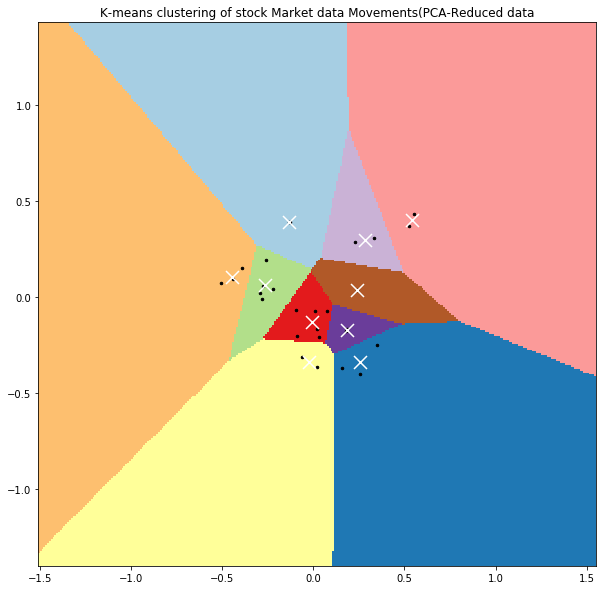

In [148]:
# Define step size of the mesh
h=.01

#Plot the decision boundary
x_min, x_max=reduced_data[:,0].min()-1,reduced_data[:,0].max()+1
y_min,y_max=reduced_data[:,1].min()-1,reduced_data[:,1].max()+1


# Defining the meshgrid between x_min and X_max with the gap of h=.01

xx,yy=np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min,y_max,h))

#Obtain labels for each point in the mesh and fit it into meshgrid 
z=Kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

#Put the result into a color plot
z=z.reshape(xx.shape)

#define a colorplot
cmap=plt.cm.Paired

#Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
#Plots the region
plt.imshow(z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=cmap,aspect='auto',origin='lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.', markersize=5) # Plots the data

#Plot the centroid of each cluster as a white X
centroids=Kmeans.cluster_centers_
#plots the centroids
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=169,linewidths=3,color='w',zorder=10)
plt.title('K-means clustering of stock Market data Movements(PCA-Reduced data')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

In [146]:
xx

array([[-1.50677717, -1.49677717, -1.48677717, ...,  1.53322283,
         1.54322283,  1.55322283],
       [-1.50677717, -1.49677717, -1.48677717, ...,  1.53322283,
         1.54322283,  1.55322283],
       [-1.50677717, -1.49677717, -1.48677717, ...,  1.53322283,
         1.54322283,  1.55322283],
       ...,
       [-1.50677717, -1.49677717, -1.48677717, ...,  1.53322283,
         1.54322283,  1.55322283],
       [-1.50677717, -1.49677717, -1.48677717, ...,  1.53322283,
         1.54322283,  1.55322283],
       [-1.50677717, -1.49677717, -1.48677717, ...,  1.53322283,
         1.54322283,  1.55322283]])